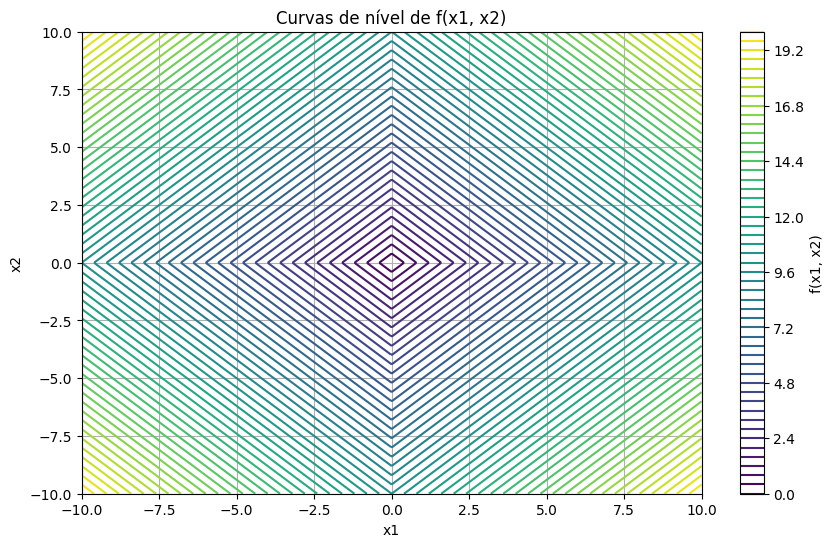


Resultado da otimização com BFGS:
Ponto ótimo: [-4.35346465e+01 -1.58161129e-09]
Valor mínimo de f(x1, x2): 43.534646510003256
Número de Iterações: 2
Número de Avaliações da Função: 345

Resultado da otimização com Nelder-Mead:
Ponto ótimo: [ 2.85375252e-07 -3.30098407e-07]
Valor mínimo de f(x1, x2): 6.154736593540941e-07
Número de Iterações: 72
Número de Avaliações da Função: 138


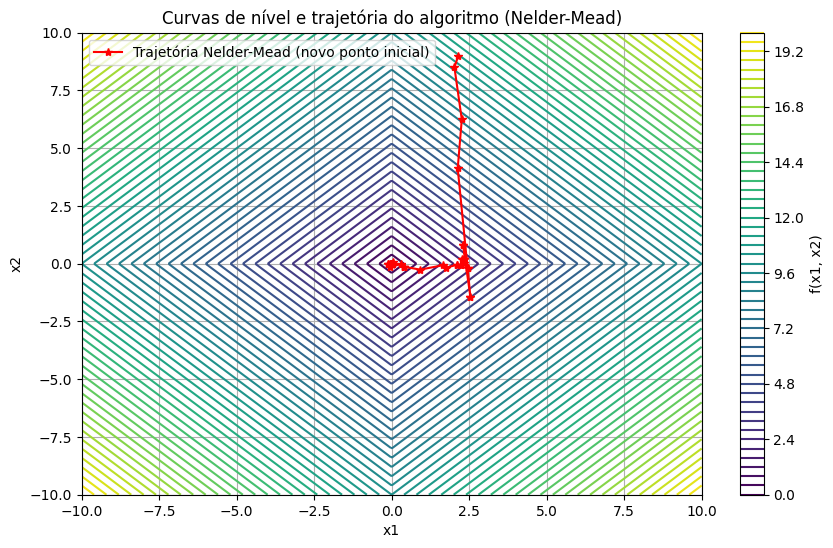

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Definição da função objetivo f(x1, x2)
def f(X):
    x1, x2 = X
    return np.abs(x1) + np.abs(x2)

# Geração de malha para curvas de nível
x1 = np.linspace(-10, 10, 500)
x2 = np.linspace(-10, 10, 500)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
f_mesh = f([x1_mesh, x2_mesh])

# Parte (a): Plotar o gráfico de curva de nível
plt.figure(figsize=(10, 6))
contour = plt.contour(x1_mesh, x2_mesh, f_mesh, levels=50, cmap='viridis')
plt.colorbar(contour, label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível de f(x1, x2)')
plt.grid()
plt.show()

# Parte (b): Otimização com BFGS e Nelder-Mead
x0_bfgs = [200, 1000]  # Ponto inicial BFGS
x0_nelder = [200, 1000]  # Ponto inicial Nelder-Mead

trajectory_bfgs = []
trajectory_nelder = []
function_values_bfgs = []
function_values_nelder = []

def callback_bfgs(x):
    trajectory_bfgs.append(x.tolist())
    function_values_bfgs.append(f(x))

def callback_nelder(x):
    trajectory_nelder.append(x.tolist())
    function_values_nelder.append(f(x))

# Minimização usando o método BFGS
result_bfgs = minimize(f,
                           x0=x0_bfgs,
                           method='BFGS',
                           callback=callback_bfgs,
                           tol=1e-6,
                           options={'maxiter': 100})

# Minimização usando o método Nelder-Mead
result_nelder = minimize(f,
                         x0=x0_nelder,
                         method='Nelder-Mead',
                         callback=callback_nelder,
                         tol=1e-6,
                         options={'maxiter': 100})

# Parte (c): Alterar o ponto inicial para (2, 10) e comparar
x0_c = [2, 10]  # Novo ponto inicial
trajectory_nelder_c = []
trajectory_bfgs_c = []
function_values_nelder_c = []
function_values_bfgs_c = []

def callback_nelder_c(x):
    trajectory_nelder_c.append(x.tolist())
    function_values_nelder_c.append(f(x))

def callback_bfgs_c(x):
    trajectory_bfgs_c.append(x.tolist())
    function_values_bfgs_c.append(f(x))

# Minimização com Nelder-Mead no novo ponto inicial
result_nelder_c = minimize(f,
                           x0=x0_c,
                           method='Nelder-Mead',
                           callback=callback_nelder_c,
                           tol=1e-6,
                           options={'maxiter': 100})

# Trajetórias e comparações
print("\nResultado da otimização com BFGS:")
print("Ponto ótimo:", result_bfgs.x)
print("Valor mínimo de f(x1, x2):", result_bfgs.fun)
print("Número de Iterações:", result_bfgs.nit)
print("Número de Avaliações da Função:", result_bfgs.nfev)


print("\nResultado da otimização com Nelder-Mead:")
print("Ponto ótimo:", result_nelder_c.x)
print("Valor mínimo de f(x1, x2):", result_nelder_c.fun)
print("Número de Iterações:", result_nelder_c.nit)
print("Número de Avaliações da Função:", result_nelder_c.nfev)

# Plotar as trajetórias dos algoritmos nas curvas de nível
plt.figure(figsize=(10, 6))
plt.contour(x1_mesh, x2_mesh, f_mesh, levels=50, cmap='viridis')
trajectory_nelder_c = np.array(trajectory_nelder_c)
plt.plot(trajectory_nelder_c[:, 0], trajectory_nelder_c[:, 1], 'r*-', label='Trajetória Nelder-Mead (novo ponto inicial)')
plt.colorbar(label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível e trajetória do algoritmo (Nelder-Mead)')
plt.legend()
plt.grid()
plt.show()


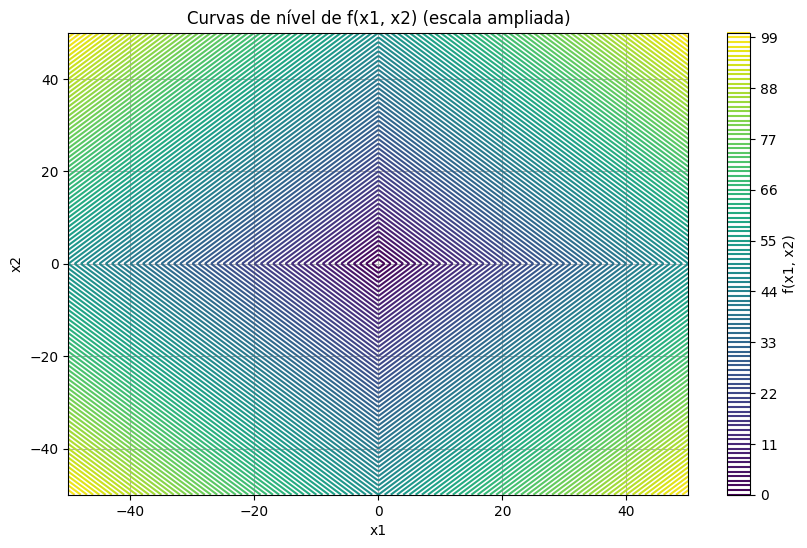


Resultado da otimização com BFGS:
Ponto ótimo: [-4.35346465e+01 -1.58161129e-09]
Valor mínimo de f(x1, x2): 43.534646510003256
Número de Iterações: 2
Número de Avaliações da Função: 345

Resultado da otimização com Nelder-Mead:
Ponto ótimo: [2.71312881e-08 2.88775093e-07]
Valor mínimo de f(x1, x2): 3.1590638139066184e-07
Número de Iterações: 87
Número de Avaliações da Função: 168


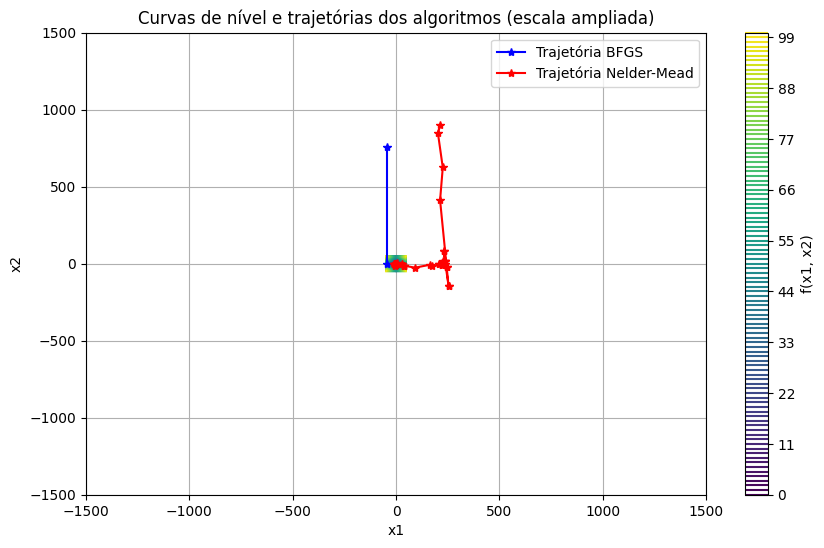

In [13]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Definição da função objetivo f(x1, x2)
def f(X):
    x1, x2 = X
    return np.abs(x1) + np.abs(x2)

# Geração de malha para curvas de nível com escala ajustada
x1 = np.linspace(-50, 50, 500)  # Aumentando o intervalo para capturar a função
x2 = np.linspace(-50, 50, 500)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
f_mesh = f([x1_mesh, x2_mesh])

# Parte (a): Plotar o gráfico de curva de nível com mais densidade
plt.figure(figsize=(10, 6))
contour = plt.contour(x1_mesh, x2_mesh, f_mesh, levels=100, cmap='viridis')  # Mais níveis para detalhamento
plt.colorbar(contour, label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível de f(x1, x2) (escala ampliada)')
plt.grid()
plt.show()

# Parte (b): Otimização com BFGS e Nelder-Mead
x0_bfgs = [200, 1000]  # Ponto inicial para BFGS
x0_nelder = [200, 1000]  # Ponto inicial para Nelder-Mead

trajectory_bfgs = []
trajectory_nelder = []

def callback_bfgs(x):
    trajectory_bfgs.append(x.tolist())

def callback_nelder(x):
    trajectory_nelder.append(x.tolist())

# Minimização usando o método BFGS
result_bfgs = minimize(f,
                       x0=x0_bfgs,
                       method='BFGS',
                       callback=callback_bfgs,
                       tol=1e-6,
                       options={'maxiter': 100})

# Minimização usando o método Nelder-Mead
result_nelder = minimize(f,
                         x0=x0_nelder,
                         method='Nelder-Mead',
                         callback=callback_nelder,
                         tol=1e-6,
                         options={'maxiter': 100})

# Parte (c): Alterar o ponto inicial para (2, 10)
x0_c = [2, 10]  # Novo ponto inicial
trajectory_bfgs_c = []
trajectory_nelder_c = []

def callback_bfgs_c(x):
    trajectory_bfgs_c.append(x.tolist())

def callback_nelder_c(x):
    trajectory_nelder_c.append(x.tolist())

# Minimização com BFGS no novo ponto inicial
result_bfgs_c = minimize(f,
                         x0=x0_c,
                         method='BFGS',
                         callback=callback_bfgs_c,
                         tol=1e-6,
                         options={'maxiter': 100})

# Minimização com Nelder-Mead no novo ponto inicial
result_nelder_c = minimize(f,
                           x0=x0_c,
                           method='Nelder-Mead',
                           callback=callback_nelder_c,
                           tol=1e-6,
                           options={'maxiter': 100})

# Resultados
print("\nResultado da otimização com BFGS:")
print("Ponto ótimo:", result_bfgs.x)
print("Valor mínimo de f(x1, x2):", result_bfgs.fun)
print("Número de Iterações:", result_bfgs.nit)
print("Número de Avaliações da Função:", result_bfgs.nfev)

print("\nResultado da otimização com Nelder-Mead:")
print("Ponto ótimo:", result_nelder.x)
print("Valor mínimo de f(x1, x2):", result_nelder.fun)
print("Número de Iterações:", result_nelder.nit)
print("Número de Avaliações da Função:", result_nelder.nfev)

# Plotar as trajetórias dos algoritmos nas curvas de nível com escala ampliada
plt.figure(figsize=(10, 6))
plt.contour(x1_mesh, x2_mesh, f_mesh, levels=100, cmap='viridis')
trajectory_bfgs = np.array(trajectory_bfgs)
trajectory_nelder = np.array(trajectory_nelder)

# Trajetória BFGS
plt.plot(trajectory_bfgs[:, 0], trajectory_bfgs[:, 1], 'b*-', label='Trajetória BFGS')
# Trajetória Nelder-Mead
plt.plot(trajectory_nelder[:, 0], trajectory_nelder[:, 1], 'r*-', label='Trajetória Nelder-Mead')

# Ajustar os limites do gráfico
plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.colorbar(label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível e trajetórias dos algoritmos (escala ampliada)')
plt.legend()
plt.grid()
plt.show()
